## MNIST dataset is a set of 70,000 small handwritten digits used to train various image processing systems

In [2]:
from sklearn.datasets import fetch_openml

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [23]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
mnist = fetch_openml('mnist_784')

In [37]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [18]:
mnist['data'].shape
#784 features for 70,000 images

(70000, 784)

In [19]:
mnist.keys()
#784 features for 70,000 images

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [34]:
X, y = mnist['data'], mnist['target']

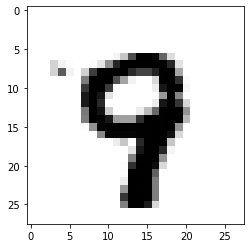

In [59]:
random_digit = X[6999]
some_random_digit = random_digit.reshape(28,28)
plt.imshow(some_random_digit, cmap = matplotlib.cm.binary, interpolation = "nearest")

In [38]:
X_train, X_test = X[:6000], X[6000:7000]
y_train, y_test = y[:6000], y[6000:7000]

In [40]:
#Shuffling data
import numpy as np

shuffle_index = np.random.permutation(6000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [41]:
y_train = y_train.astype(np.int8)
y_test = y_train.astype(np.int8)

y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [42]:
y_test_2

array([False, False, False, ...,  True, False, False])

## Build a predictor which says whether image will be 2 or not

### Logistic regression classifier

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
clf = LogisticRegression(tol = 0.1)  #tol = tolerance

In [48]:
clf.fit(X_train, y_train_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.1, verbose=0,
                   warm_start=False)

In [49]:
y_pred = clf.predict([random_digit])

In [50]:
y_pred #Random digit is not 2

array([False])

In [52]:
y_pred_2 = clf.predict([X[4599]])

In [53]:
y_pred_2    #Predicts true since the number is 2

array([ True])

## Model Evaluation

### Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score

In [56]:
a = cross_val_score(clf, X_train, y_train_2, cv = 3, scoring = "accuracy")

In [57]:
a.mean()

0.9723329953332488

## Using Support Vector Machine (SVM)

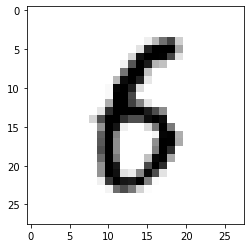

In [60]:
random_digit = X[4560]
some_random_digit = random_digit.reshape(28,28)
plt.imshow(some_random_digit, cmap = matplotlib.cm.binary, interpolation = "nearest")

In [61]:
from sklearn import svm

In [63]:
clf2 = svm.SVC()

In [64]:
clf2.fit(X_train, y_train_2)
y_pred = clf.predict([random_digit])

In [65]:
y_pred

array([False])

In [66]:
a = cross_val_score(clf2, X_train, y_train_2, cv = 3, scoring = "accuracy")

In [67]:
a.mean()

0.9031667338750168